## Import libraries

In [5]:
import numpy as np 
import os
import cv2
import tensorflow
from tensorflow import keras
from keras.models import   Model
from keras.models import load_model
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input


from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as ppt

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)
                                   
test_datagen = ImageDataGenerator(rescale=1./255,)
val_datagen = ImageDataGenerator(rescale=1./255,)

In [3]:
train = train_datagen.flow_from_directory('Data/train/',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='categorical')
test = test_datagen.flow_from_directory('Data/test/',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='categorical')
val = val_datagen.flow_from_directory('Data/valid/',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='categorical')

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [4]:
base = VGG16(input_shape=(128,128,3),weights='imagenet',include_top=False)

In [5]:
for layer in base.layers:
    base.trainable=False

In [6]:
inp = base.input
x =base.output
x = Flatten()(x)
x = Dense(1024,activation ='relu')(x)
x= Dropout(rate = 0.5)(x)
output = Dense(4,activation = 'softmax')(x)
model = Model(inputs =inp ,outputs = output)

In [7]:
model.compile(loss ='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [8]:
histroy = model.fit(train,batch_size=32,epochs=5,verbose=1,validation_data=[val])

Epoch 1/5


20/20 [==============================] - 646s 32s/step - loss: 3.6161 - accuracy: 0.4095 - val_loss: 1.5265 - val_accuracy: 0.4306
Epoch 2/5
20/20 [==============================] - 658s 33s/step - loss: 1.1946 - accuracy: 0.5710 - val_loss: 0.9561 - val_accuracy: 0.5972
Epoch 3/5
20/20 [==============================] - 616s 32s/step - loss: 0.7377 - accuracy: 0.6688 - val_loss: 0.8209 - val_accuracy: 0.5972
Epoch 4/5
20/20 [==============================] - 596s 30s/step - loss: 0.6385 - accuracy: 0.7341 - val_loss: 0.7628 - val_accuracy: 0.6389
Epoch 5/5
20/20 [==============================] - 1590s 82s/step - loss: 0.5698 - accuracy: 0.7488 - val_loss: 0.8683 - val_accuracy: 0.5556


In [9]:
model.evaluate(test,batch_size=32)

10/10 [==============================] - 300s 30s/step - loss: 0.9187 - accuracy: 0.5429


[0.918718695640564, 0.5428571701049805]

In [10]:
model.save(r'C:\Users\Dell\venv\MACHINE LEARNING (Self code)\model1.h5')

c:\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


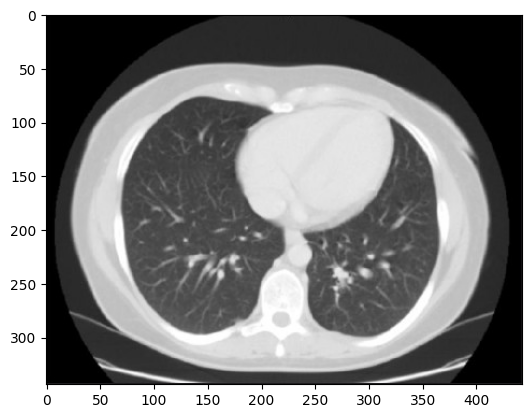

In [11]:
image = cv2.imread(r'C:\Users\Dell\venv\MACHINE LEARNING (Self code)\Data\train\normal\3 - Copy (3).png')
ppt.imshow(image)

In [3]:
model__ct=load_model('model1.h5')

In [6]:
img = image.load_img(r'C:\Users\Dell\Downloads\covid x-ray.jpg',target_size=(128,128))
x=image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)

In [7]:
classes = model__ct.predict(img_data)
result =(int(classes[0][0]))

1/1 [==============================] - 4s 4s/step


In [8]:
if result ==1:
     print('Person is affected by covid')
else:
    print('person is normal')

person is normal
